In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Camera Range Resolution
Camera FOV data is from [elinux.org](https://elinux.org/Rpi_Camera_Module#Technical_Parameters_.28v.2_board.29). Note that there may be pixel cropping in certain modes.

In [2]:
pixels_h = 320
pixels_v = 180
fov_h = math.radians(62.2)
fov_v = math.radians(58.8)
height_t = 98.25
h_cam = 28.0
df = pd.DataFrame(data=np.arange(1, 648, 1),columns=['range'])

Use frame to form a right triangle with adjacent side representing range to target ($r$), opposite side ($h_t$) height of target surface that subtends vertical FOV ($fov_h$).


$\tan{fov_v} = \dfrac{h_t}{r}$

Solving for $h_t$ and dividing by number of vertical pixels in frame gives target height per pixel ($h_p$).

$h_p = \frac{r\tan{fov_v}}{pixels_v}$

Text(0, 0.5, 'Height per Pixel (in)')

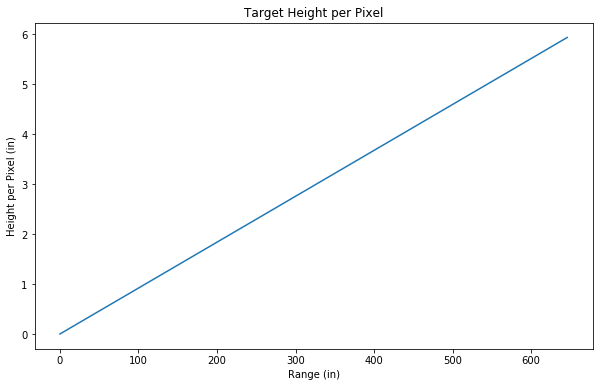

In [3]:
def pixel_height(r):
    h_t = r * math.tan(fov_v)
    return h_t / pixels_v

df['pixel_height'] = df['range'].apply(pixel_height)

df['pixel_height'].plot(figsize = [10, 6])
plt.title("Target Height per Pixel")
plt.xlabel("Range (in)")
plt.ylabel("Height per Pixel (in)")

As a first approximation, assume measured angle is 45 deg. such that tan(45) = 1, then height increment per pixel is equivalent to range increment per pixel.

At 35 ft. height change per pixel is:

In [13]:
r_nom = 35 * 12
print(pixel_height(r_nom))
tan = height_t / r_nom

3.8527912720028117


In [15]:
r_err = ((height_t + pixel_height(r_nom)) / tan) - r_nom
r_err

16.46994742230214

In [16]:
tan

0.23392857142857143